In [1]:
import scipy.io as scio
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
import openpyxl
from datetime import datetime as dt
from datetime import timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import Button, Layout
import mplcursors
import os
from itertools import chain
from matplotlib.widgets import Button
from pathlib import Path
import xlrd
import warnings
import matplotlib.dates as mdates
import seaborn as sns
import random
import ipywidgets as widgets
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import researchpy
import scipy.stats as stats

warnings.simplefilter('ignore')



In [2]:
os.chdir('C:\\01_Work\\1Project Home\\1Research\\GRAYS\\_ERLATFEED\\analysisoutput\\')
feed = pd.read_excel("master-feed+tide.xlsx")
feed
sumall = feed[['meanPitchFP', 'durFP_s', 'meanRollFP', 'descTideDensityHr']].describe()
sumbydep = feed.groupby('depID')[['meanPitchFP', 'durFP_s', 'meanRollFP', 'descTideDensityHr']].describe()
sumbyind = feed.groupby('name')[['meanPitchFP', 'durFP_s', 'meanRollFP', 'descTideDensityHr']].describe()

sumbyind

meanPitchFP                                          \
                          count      mean       std       min       25%   
name                                                                      
CRC-21 (Shackleton)       370.0 -0.458073  0.259225 -1.031161 -0.682333   
CRC-22 (Earhart)          276.0 -0.340087  0.185015 -0.904824 -0.396496   
CRC-383 (Cascade)         268.0 -0.376960  0.143840 -0.691869 -0.407097   
CRC-531 (Gretchen)        206.0 -0.457736  0.034342 -0.552656 -0.482833   
CRC-543                   151.0 -0.166509  0.089211 -0.402164 -0.231369   
CRC-723 (Lucyfer)         460.0 -0.336089  0.249100 -0.901244 -0.412460   

                                                  durFP_s             ...  \
                          50%       75%       max   count       mean  ...   
name                                                                  ...   
CRC-21 (Shackleton) -0.470244 -0.194375 -0.040790   370.0  14.436757  ...   
CRC-22 (Earhart)    -0.297703 -0.244958  0.684655   276.0  40.154348  ...   
CRC-383 (Cascade)   -0.324752 -0.283530  0.076506   268.0  34.113806  ...   
CRC-531 (Gretchen)  -0.460659 -0.433740 -0.363709   206.0  30.575728  ...   
CRC-543             -0.180767 -0.103479  0.239513   151.0  38.023841  ...   
CRC-723 (Lucyfer)   -0.285697 -0.179942  0.481600   460.0  95.099783  ...   

                     meanRollFP             descTideDensityHr             \
                            75%         max             count       mean   
name                                                                       
CRC-21 (Shackleton)  107.374901  141.557480             370.0  33.262545   
CRC-22 (Earhart)     112.287424  126.428616             276.0  30.325884   
CRC-383 (Cascade)    113.986442  133.586550             268.0  29.001443   
CRC-531 (Gretchen)   119.317675  128.567451             206.0  28.204569   
CRC-543              134.524257  154.136599             151.0  15.926981   
CRC-723 (Lucyfer)    109.782448  117.902668             460.0  14.136541   

                                                                           \
                           std       min        25%        50%        75%   
name                                                                        
CRC-21 (Shackleton)  13.844162  9.307479  15.039164  41.639344  43.955600   
CRC-22 (Earhart)      9.881557  0.345821  22.478386  36.279070  36.279070   
CRC-383 (Cascade)     9.488692  5.811966  32.642487  34.140436  34.529915   
CRC-531 (Gretchen)    8.407578  2.406417  30.186335  30.186335  32.063492   
CRC-543               6.432537  4.048583   8.737864  14.920635  22.732919   
CRC-723 (Lucyfer)     4.888136  0.664820  11.301939  14.139827  18.803419   

                                
                           max  
name                            
CRC-21 (Shackleton)  43.955600  
CRC-22 (Earhart)     37.393768  
CRC-383 (Cascade)    34.529915  
CRC-531 (Gretchen)   32.063492  
CRC-543              22.732919  
CRC-723 (Lucyfer)    20.732984  

[6 rows x 32 columns]

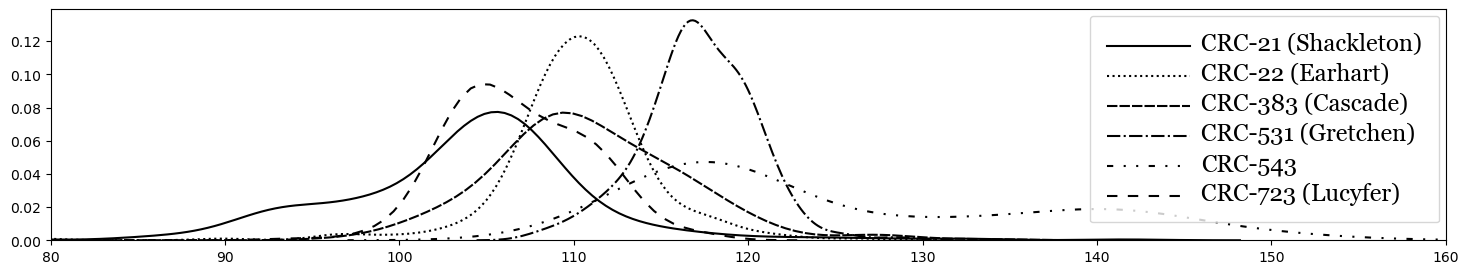

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

line_styles = ['solid', 'dotted', (0,(5,1)), 'dashdot', (0,(3,5,1,5,1,5)), (0,(5,5))]

# Create a density plot with different line styles for each unique 'name'
fig, ax = plt.subplots(figsize = (18,3))

for i, (name, group) in enumerate(feed.groupby('name')):
    sns.kdeplot(data=group['meanRollFP'], ax=ax, label=name, linestyle=line_styles[i], color = 'black')
ax.set_xlim(80, 160)
# Set labels and title
ax.set_xlabel("")
ax.set_ylabel("")

# Add legend
legend = ax.legend(loc='upper right', handlelength=6, borderpad=1.2)
legend.get_title().set_fontsize('large')
legend.get_title().set_fontname("Georgia")
for text in legend.get_texts():
    text.set_fontsize('xx-large')
    text.set_fontname("Georgia")

# Show the plot
plt.show()


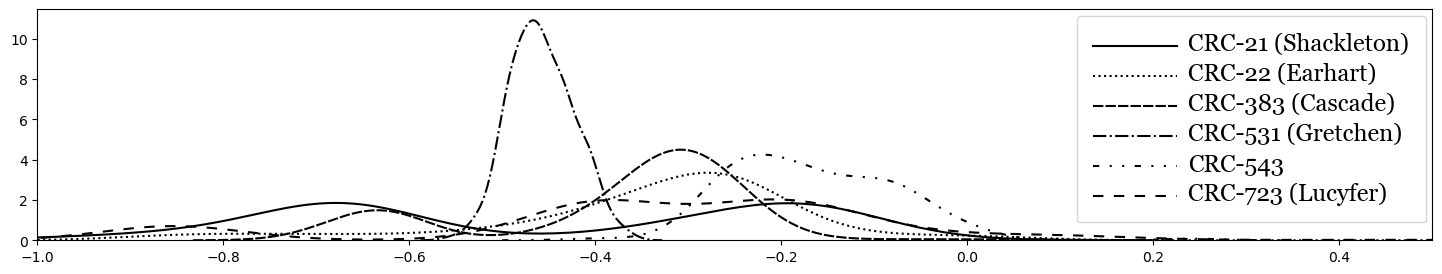

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

line_styles = ['solid', 'dotted', (0,(5,1)), 'dashdot', (0,(3,5,1,5,1,5)), (0,(5,5))]

# Create a density plot with different line styles for each unique 'name'
fig, ax = plt.subplots(figsize = (18,3))

for i, (name, group) in enumerate(feed.groupby('name')):
    sns.kdeplot(data=group['meanPitchFP'], ax=ax, label=name, linestyle=line_styles[i], color = 'black')
ax.set_xlim(-1.0, 0.5)
# Set labels and title
ax.set_xlabel("")
ax.set_ylabel("")

# Add legend
legend = ax.legend(loc='upper right', handlelength=6, borderpad=1.2)
legend.get_title().set_fontsize('large')
legend.get_title().set_fontname("Georgia")
for text in legend.get_texts():
    text.set_fontsize('xx-large')
    text.set_fontname("Georgia")

# Show the plot
plt.show()


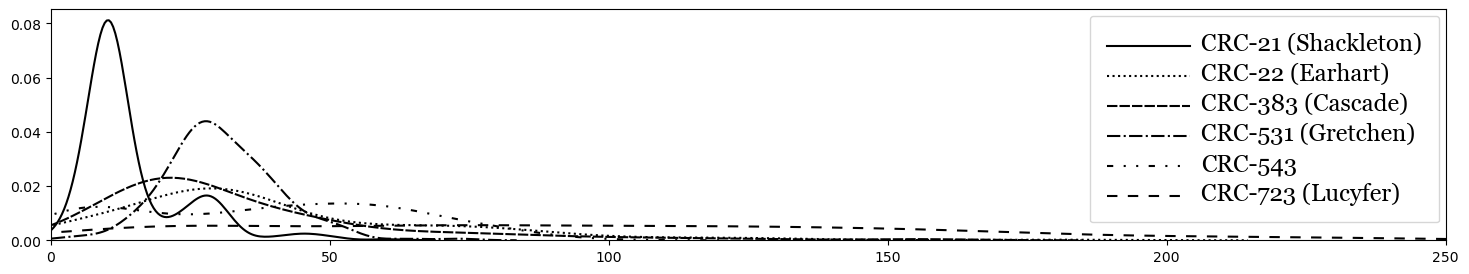

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feed2 = feed[feed.select_dtypes(include=[np.number]).ge(0).all(1)]



line_styles = ['solid', 'dotted', (0,(5,1)), 'dashdot', (0,(3,5,1,5,1,5)), (0,(5,5))]

# Create a density plot with different line styles for each unique 'name'
fig, ax = plt.subplots(figsize = (18,3))

for i, (name, group) in enumerate(feed.groupby('name')):
    sns.kdeplot(data=group['durFP_s'], ax=ax, label=name, linestyle=line_styles[i], color = 'black')
ax.set_xlim(0, 250)
# Set labels and title
ax.set_xlabel("")
ax.set_ylabel("")

# Add legend
legend = ax.legend(loc='upper right', handlelength=6, borderpad=1.2)
legend.get_title().set_fontsize('large')
legend.get_title().set_fontname("Georgia")
for text in legend.get_texts():
    text.set_fontsize('xx-large')
    text.set_fontname("Georgia")

# Show the plot
plt.show()


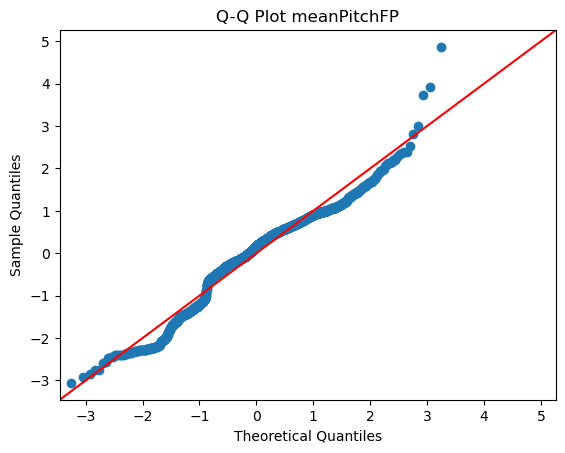

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
filtdat = feed['meanPitchFP'].dropna()
sm.qqplot(filtdat, line='45', fit=True)
plt.title('Q-Q Plot meanPitchFP')
plt.show()

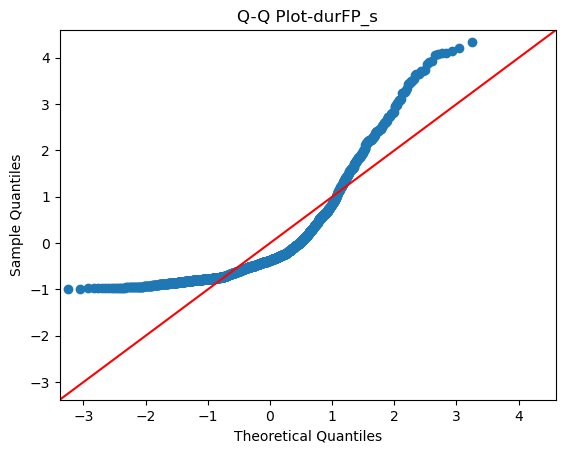

In [10]:
import matplotlib.pyplot as plt
filtdat = feed['durFP_s'].dropna()
sm.qqplot(filtdat, line='45', fit=True)
plt.title('Q-Q Plot-durFP_s')
plt.show()

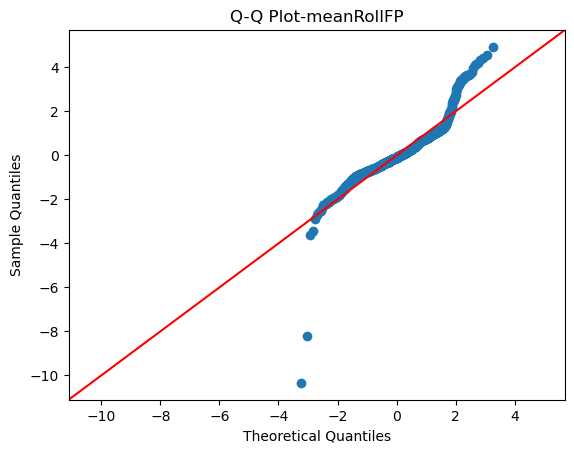

In [11]:
import matplotlib.pyplot as plt
filtdat = feed['meanRollFP'].dropna()
sm.qqplot(filtdat, line='45', fit=True)
plt.title('Q-Q Plot-meanRollFP')
plt.show()

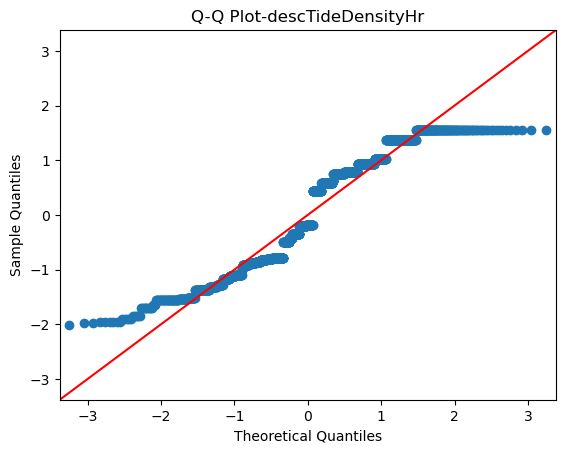

In [12]:
import matplotlib.pyplot as plt
filtdat = feed['descTideDensityHr'].dropna()
sm.qqplot(filtdat, line='45', fit=True)
plt.title('Q-Q Plot-descTideDensityHr')
plt.show()

In [13]:
from scipy.stats import kruskal
filtfeed = feed[feed['meanPitchFP'].notna()]
filtfeed
filtfeed['name'] = filtfeed['name'].astype('category')

groups = [filtfeed[filtfeed['name'] == name]['meanPitchFP'] for name in filtfeed['name'].cat.categories]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print('mean pitch in feedig position')
# Display the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the result is statistically significant (using a common significance level like 0.05)
if p_value < 0.05:
    print("The difference between groups is statistically significant.")
else:
    print("There is no significant difference between groups.")

mean pitch in feedig position
Kruskal-Wallis Test Statistic: 356.7929422086636
P-value: 6.032352387286036e-75
The difference between groups is statistically significant.


In [14]:
filtfeed = feed[feed['meanRollFP'].notna()]
filtfeed
filtfeed['name'] = filtfeed['name'].astype('category')

groups = [filtfeed[filtfeed['name'] == name]['meanRollFP'] for name in filtfeed['name'].cat.categories]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print('mean roll in feeding position')
# Display the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the result is statistically significant (using a common significance level like 0.05)
if p_value < 0.05:
    print("The difference between groups is statistically significant.")
else:
    print("There is no significant difference between groups.")

mean roll in feeding position
Kruskal-Wallis Test Statistic: 920.7976905688583
P-value: 8.390760750011562e-197
The difference between groups is statistically significant.


In [15]:
filtfeed = feed[feed['durFP_s'].notna()]
filtfeed
filtfeed['name'] = filtfeed['name'].astype('category')

groups = [filtfeed[filtfeed['name'] == name]['durFP_s'] for name in filtfeed['name'].cat.categories]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print('mean duration in feeding position')
# Display the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the result is statistically significant (using a common significance level like 0.05)
if p_value < 0.05:
    print("The difference between groups is statistically significant.")
else:
    print("There is no significant difference between groups.")

mean duration in feeding position
Kruskal-Wallis Test Statistic: 700.0852155082016
P-value: 4.707950523396815e-149
The difference between groups is statistically significant.


In [16]:
filtfeed = feed[feed['descTideDensityHr'].notna()]
filtfeed
filtfeed['name'] = filtfeed['name'].astype('category')

groups = [filtfeed[filtfeed['name'] == name]['descTideDensityHr'] for name in filtfeed['name'].cat.categories]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print('feeding rate per tidal quarter')
# Display the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the result is statistically significant (using a common significance level like 0.05)
if p_value < 0.05:
    print("The difference between groups is statistically significant.")
else:
    print("There is no significant difference between groups.")

feeding rate per tidal quarter
Kruskal-Wallis Test Statistic: 671.5704165082199
P-value: 6.882269872439257e-143
The difference between groups is statistically significant.


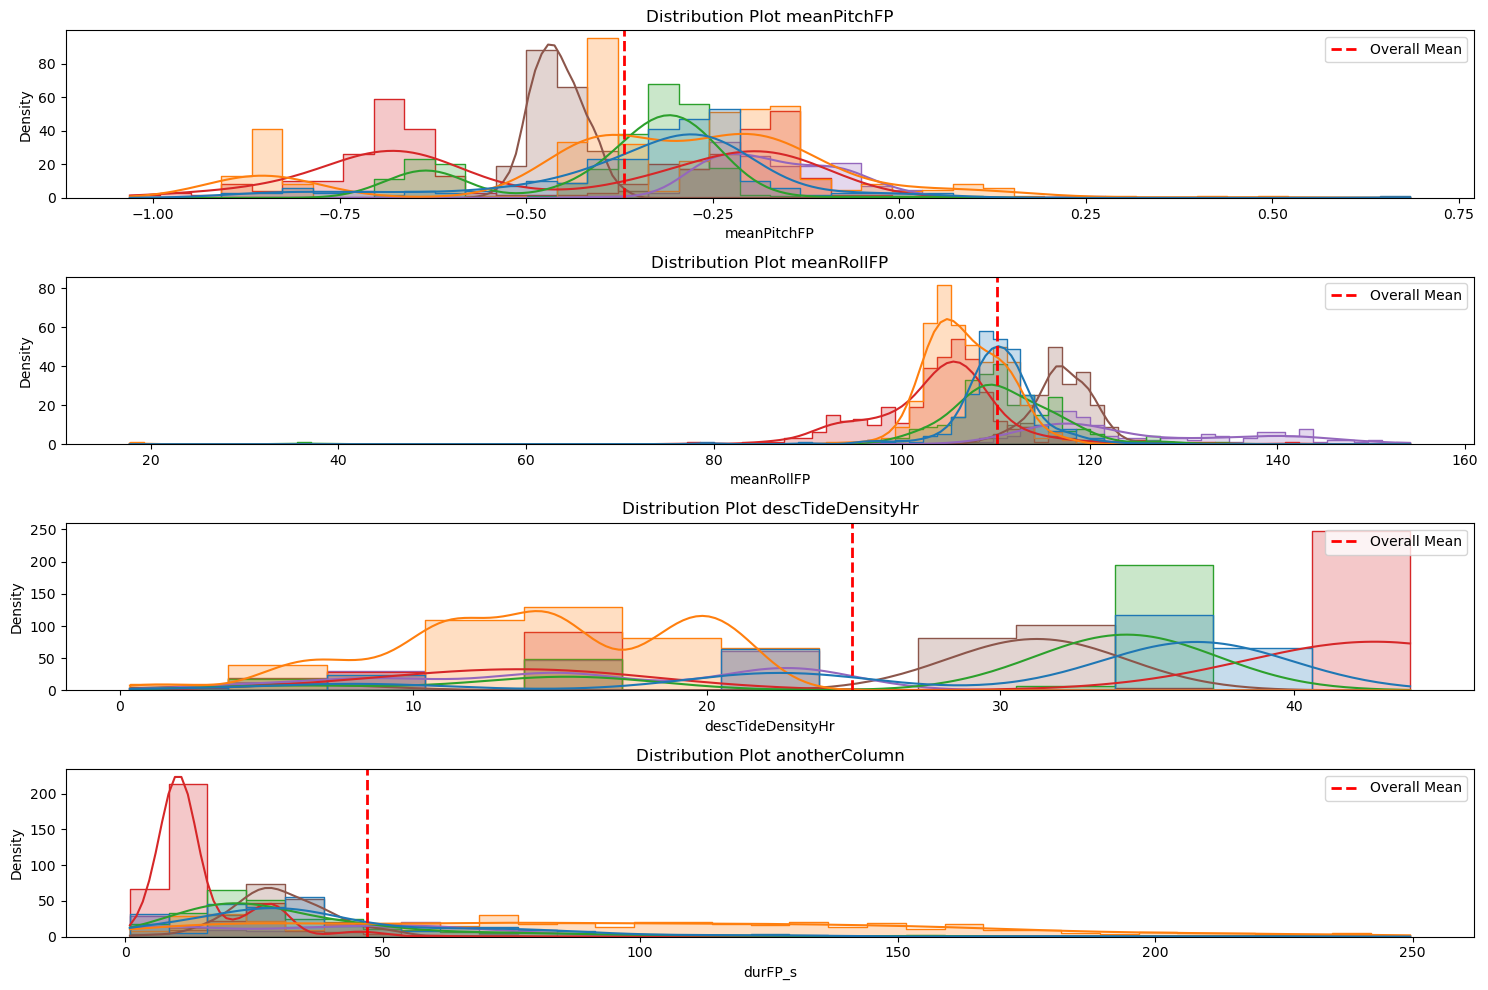

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'meanPitchFP', 'meanRollFP', 'descTideDensityHr', and 'anotherColumn' are the columns you want to create plots for
filtdat_pitch = feed[feed['meanPitchFP'].notna()]
filtdat_roll = feed[feed['meanRollFP'].notna()]
filtdat_tide = feed[feed['descTideDensityHr'].notna()]
filtdat_another = feed[feed['durFP_s'].notna()]

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

# Plot 1: Distribution plot for 'meanPitchFP'
sns.histplot(data=filtdat_pitch, x='meanPitchFP', hue='name', kde=True, element="step", common_norm=False, ax=axes[0])
overall_mean_pitch = filtdat_pitch['meanPitchFP'].mean()
axes[0].axvline(x=overall_mean_pitch, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
axes[0].set_xlabel('meanPitchFP')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution Plot meanPitchFP')
axes[0].legend()

# Plot 2: Distribution plot for 'meanRollFP'
sns.histplot(data=filtdat_roll, x='meanRollFP', hue='name', kde=True, element="step", common_norm=False, ax=axes[1])
overall_mean_roll = filtdat_roll['meanRollFP'].mean()
axes[1].axvline(x=overall_mean_roll, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
axes[1].set_xlabel('meanRollFP')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution Plot meanRollFP')
axes[1].legend()

# Plot 3: Distribution plot for 'descTideDensityHr'
sns.histplot(data=filtdat_tide, x='descTideDensityHr', hue='name', kde=True, element="step", common_norm=False, ax=axes[2])
overall_mean_tide = filtdat_tide['descTideDensityHr'].mean()
axes[2].axvline(x=overall_mean_tide, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
axes[2].set_xlabel('descTideDensityHr')
axes[2].set_ylabel('Density')
axes[2].set_title('Distribution Plot descTideDensityHr')
axes[2].legend()

# Plot 4: Distribution plot for 'anotherColumn'
sns.histplot(data=filtdat_another, x='durFP_s', hue='name', kde=True, element="step", common_norm=False, ax=axes[3])
overall_mean_another = filtdat_another['durFP_s'].mean()
axes[3].axvline(x=overall_mean_another, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')
axes[3].set_xlabel('durFP_s')
axes[3].set_ylabel('Density')
axes[3].set_title('Distribution Plot anotherColumn')
axes[3].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()
